# Pivot de gauss avec numpy

Etape par étape, le pivote de Gauss implémenté en python puis avec numpy.

In [7]:
%matplotlib inline

## Python

In [8]:
import numpy

In [9]:
def pivot_gauss(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i - 1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = -m[j, i - 1] / m[i - 1, i - 1]
            for k in range(i - 1, m.shape[1]):
                m[j, k] += coef * m[i - 1, k]
    return m


m = numpy.random.rand(4, 4)
piv = pivot_gauss(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.58650968,  0.72315516,  0.9137217 ,  0.04526746],
       [ 0.        ,  0.70012278,  0.87604076,  0.92402115],
       [ 0.        ,  0.        , -0.36865515,  1.00362559],
       [ 0.        ,  0.        ,  0.        ,  0.26361505]])

`* (numpy.abs(piv) > 1e-10)` sert à simplifier l'affichage des valeurs quasi nulles.

## Numpy 1

In [10]:
def pivot_gauss2(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i - 1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = -m[j, i - 1] / m[i - 1, i - 1]
            m[j, i - 1 :] += m[i - 1, i - 1 :] * coef
    return m


piv = pivot_gauss2(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.58650968,  0.72315516,  0.9137217 ,  0.04526746],
       [ 0.        ,  0.70012278,  0.87604076,  0.92402115],
       [ 0.        ,  0.        , -0.36865515,  1.00362559],
       [ 0.        ,  0.        ,  0.        ,  0.26361505]])

## Numpy 2

In [11]:
def pivot_gauss3(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i - 1] == 0:
            j0 += 1
        coef = -m[j0:, i - 1] / m[i - 1, i - 1]
        m[j0:, i - 1 :] += coef.reshape((-1, 1)) * m[i - 1, i - 1 :].reshape((1, -1))
    return m


piv = pivot_gauss3(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.58650968,  0.72315516,  0.9137217 ,  0.04526746],
       [ 0.        ,  0.70012278,  0.87604076,  0.92402115],
       [ 0.        ,  0.        , -0.36865515,  1.00362559],
       [ 0.        ,  0.        ,  0.        ,  0.26361505]])

## Vitesse

In [12]:
from tqdm import tqdm
import pandas
from teachpyx.ext_test_case import measure_time

data = []
for n in tqdm([10, 20, 30, 40, 50, 60, 70, 80, 100]):
    m = numpy.random.rand(n, n)
    if n < 50:
        res = measure_time(lambda: pivot_gauss(m), number=10, repeat=10)
        res.update(dict(name="python", n=n))
        data.append(res)
    res = measure_time(lambda: pivot_gauss2(m), number=10, repeat=10)
    res.update(dict(name="numpy1", n=n))
    data.append(res)
    res = measure_time(lambda: pivot_gauss3(m), number=10, repeat=10)
    res.update(dict(name="numpy2", n=n))
    data.append(res)

df = pandas.DataFrame(data)
df

100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


,average,deviation,min_exec,max_exec,repeat,number,ttime,context_size,warmup_time,name,n
0,0.000051,0.000030,0.000028,0.000125,10,10,0.000512,64,0.000728,python,10
1,0.000045,0.000021,0.000028,0.000094,10,10,0.000447,64,0.000046,numpy1,10
2,0.000137,0.000024,0.000110,0.000197,10,10,0.001367,64,0.000253,numpy2,10
3,0.001134,0.000540,0.000623,0.002258,10,10,0.011340,64,0.003184,python,20
4,0.001312,0.000678,0.000639,0.002858,10,10,0.013121,64,0.001035,numpy1,20
5,0.000375,0.000184,0.000233,0.000818,10,10,0.003753,64,0.001292,numpy2,20
6,0.001557,0.001094,0.000686,0.003803,10,10,0.015571,64,0.016613,python,30
7,0.000404,0.000062,0.000331,0.000553,10,10,0.004045,64,0.000364,numpy1,30
8,0.000471,0.000037,0.000440,0.000545,10,10,0.004713,64,0.000482,numpy2,30
9,0.003798,0.001491,0.002594,0.007715,10,10,0.037978,64,0.018972,python,40


In [13]:
piv = df.pivot(index="n", columns="name", values="average")
piv

name,numpy1,numpy2,python
n,,,
10,0.000045,0.000137,0.000051
20,0.001312,0.000375,0.001134
30,0.000404,0.000471,0.001557
40,0.001324,0.000820,0.003798
50,0.004260,0.001690,NaN
60,0.009320,0.001664,NaN
70,0.005314,0.001629,NaN
80,0.011036,0.002637,NaN
100,0.021563,0.004673,NaN


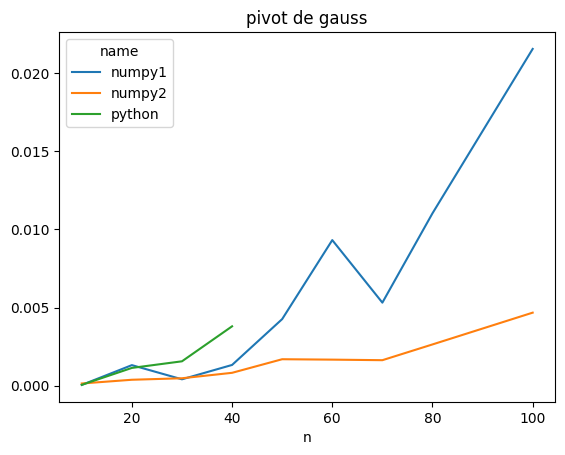

In [14]:
piv.plot(title="pivot de gauss");